In [31]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

CSV_PATH="cleaned_songs.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47

In [32]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1194,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1195,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1196,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1197,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


author
Блаже Конески           182
Пијан Славеј            160
Ефтим Клетников         135
Славко Јаневски          70
Владо Урошевиќ           61
Катица Ќулавкова         60
Братислав Ташковски      55
Веле Смилевски           51
Ристо Лазаров            48
Адам Гајтани             47
Бранко Цветкоски         41
Петре М. Андреевски      41
Милош Линдро             40
Тодор Чаловски           31
Ацо Шопов                31
Анте Поповски            21
Гане Тодоровски          19
Богомил Ѓузел            19
Игор Исаковски           15
Матеја Матевски          14
Кочо Рацин               13
Лилјана Дирјан            7
Јосип Коцев               6
Ацо Караманов             4
Тихомир Јанчовски         4
Коле Неделковски          4
Видое Подгорец            3
Раде Силјан               3
Константин Миладинов      3
Цане Андреевски           2
Ванчо Николески           2
Никола Вапцаров           2
Рајко Жинзифов            1
Никола Маџиров            1
Јован Котески             1
Радован Павло

/tmp/ipykernel_6340/1049885675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")


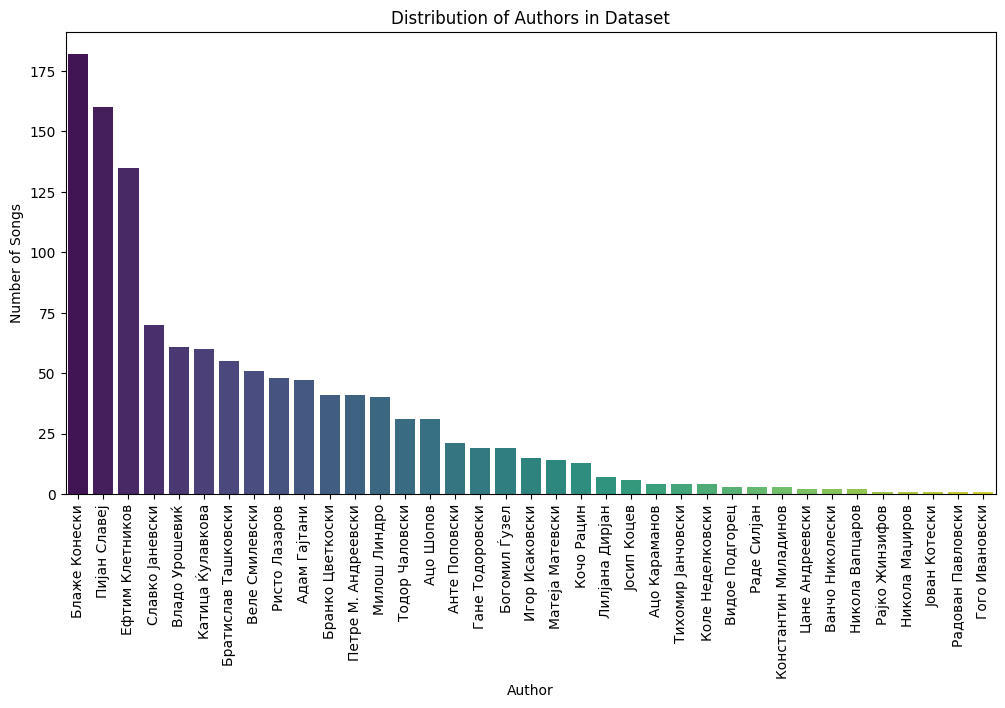

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


author_counts = df["author"].value_counts()

print(author_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Number of Songs")
plt.title("Distribution of Authors in Dataset")
plt.show()


In [34]:
len_df=df.copy()

len_df['char_count']=len_df['song_text'].str.len()
result_char = len_df.groupby("author")[["char_count"]].sum().reset_index().sort_values('char_count',ascending=False) 
result_char
    

,author,char_count
6,Блаже Конески,85707
28,Пијан Славеј,58934
7,Богомил Ѓузел,57509
16,Ефтим Клетников,56526
33,Славко Јаневски,54619
18,Катица Ќулавкова,51382
27,Петре М. Андреевски,45774
13,Владо Урошевиќ,33942
2,Адам Гајтани,32600
32,Ристо Лазаров,29858


In [35]:
len_df['word_count']=len_df['song_text'].str.split().str.len()
result_word = len_df.groupby("author")[["word_count"]].sum().reset_index().sort_values('word_count',ascending=False) 
result_word
    

,author,word_count
6,Блаже Конески,15589
28,Пијан Славеј,10701
16,Ефтим Клетников,9769
7,Богомил Ѓузел,9708
33,Славко Јаневски,9350
18,Катица Ќулавкова,8237
27,Петре М. Андреевски,8205
13,Владо Урошевиќ,5425
2,Адам Гајтани,5331
32,Ристо Лазаров,4763


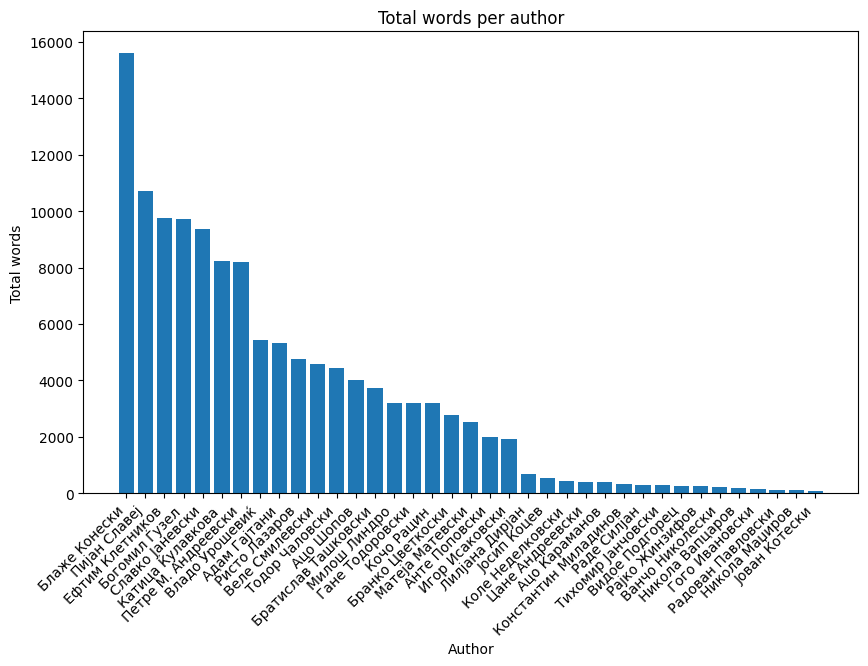

In [36]:
plt.figure(figsize=(10,6))
plt.bar(result_word["author"], result_word["word_count"])
plt.title("Total words per author")
plt.xlabel("Author")
plt.ylabel("Total words")
plt.xticks(rotation=45,ha='right')
plt.show()

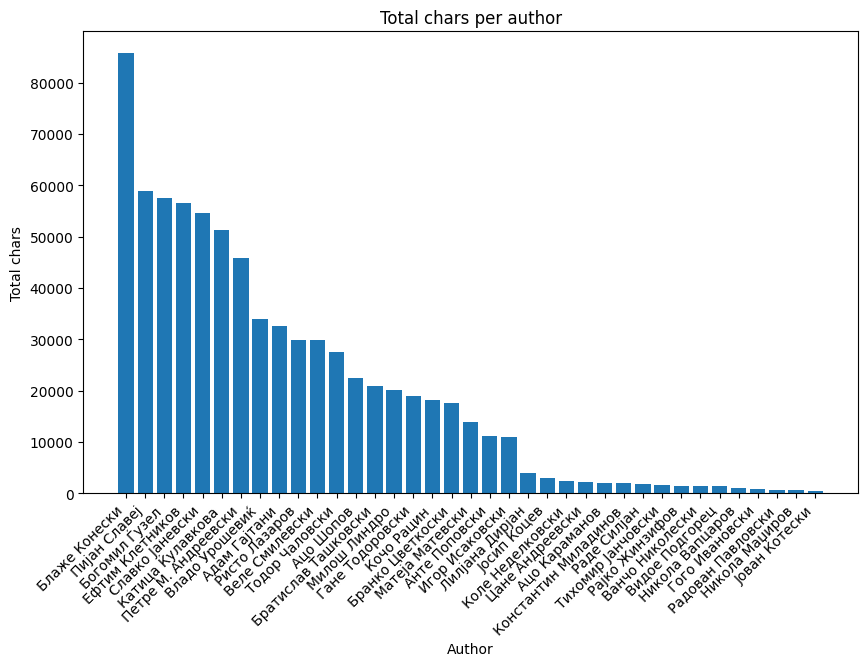

In [37]:
plt.figure(figsize=(10,6))
plt.bar(result_char["author"], result_char["char_count"])
plt.title("Total chars per author")
plt.xlabel("Author")
plt.ylabel("Total chars")
plt.xticks(rotation=45,ha='right')
plt.show()

In [8]:
print(f'Word count described:\n{len_df['word_count'].describe()}')
print(f'Total word count: {len_df['word_count'].sum()}')

Word count described:
count    1199.000000
mean      106.363636
std        97.029862
min         1.000000
25%        58.000000
50%        83.000000
75%       118.500000
max      1240.000000
Name: word_count, dtype: float64
Total word count: 127530


In [9]:
print(f'Char count described:\n{len_df['char_count'].describe()}')
print(f'Total char count: {len_df['char_count'].sum()}')

Char count described:
count    1199.000000
mean      621.750626
std       565.858197
min        57.000000
25%       329.000000
50%       492.000000
75%       703.500000
max      7430.000000
Name: char_count, dtype: float64
Total char count: 745479


Testing  of the models.

In [12]:
train, test = train_test_split(df, test_size=0.3, random_state=random_seed)
train_x, train_y = train['song_text'], train['author']
test_x, test_y = test['song_text'], test['author']
all_authors=df['author']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_x).toarray()
X_test = vectorizer.transform(test_x).toarray()

label_encoder = LabelEncoder()
label_encoder.fit(all_authors)
train_y_encoded = label_encoder.transform(train_y)

mask = test_y.isin(train_y)
X_test = X_test[mask.values]
test_y = test_y[mask]
test_y_encoded = label_encoder.transform(test_y)

num_classes = len(label_encoder.classes_)


def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 15)
    neurons = trial.suggest_categorical("neurons", [64, 128, 256, 512,1024])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    epochs = trial.suggest_int("epochs", 5, 100) 

    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation="softmax"))

    if optimizer_name == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

   
    model.fit(
        X_train, train_y_encoded,
        validation_data=(X_test, test_y_encoded),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )

    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    f1 = f1_score(test_y_encoded, y_pred, average="weighted")
    return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)


[I 2025-09-24 15:11:01,244] A new study created in memory with name: no-name-063bdc57-7124-4361-a707-c640fefb330a
[I 2025-09-24 15:11:39,654] Trial 0 finished with value: 0.2208795400249654 and parameters: {'n_layers': 15, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.14831495705486178, 'optimizer': 'adam', 'lr': 0.0028483401174322336, 'epochs': 61}. Best is trial 0 with value: 0.2208795400249654.
[I 2025-09-24 15:13:02,800] Trial 1 finished with value: 0.3485475709108036 and parameters: {'n_layers': 6, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.4397962714360868, 'optimizer': 'adam', 'lr': 0.00012886337339475005, 'epochs': 79}. Best is trial 1 with value: 0.3485475709108036.
[I 2025-09-24 15:13:31,045] Trial 2 finished with value: 0.3717801913389449 and parameters: {'n_layers': 8, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.21728851898297724, 'optimizer': 'rmsprop', 'lr': 0.0030127585440450633, 'epochs': 61}. Best is trial 2 with value: 0.37178019133894

Best F1 Score: 0.646374359937885
Best hyperparameters: {'n_layers': 1, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.12585953325685081, 'optimizer': 'rmsprop', 'lr': 0.008932202078992958, 'epochs': 97}


64 min 29 seconnds 

Epoch 1/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2086 - loss: 2.9000 - val_accuracy: 0.1961 - val_loss: 2.4313
Epoch 2/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7449 - loss: 1.3531 - val_accuracy: 0.5658 - val_loss: 1.6294
Epoch 3/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9678 - loss: 0.2821 - val_accuracy: 0.6891 - val_loss: 1.2907
Epoch 4/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9940 - loss: 0.0685 - val_accuracy: 0.6835 - val_loss: 1.2015
Epoch 5/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 0.6975 - val_loss: 1.0995
Epoch 6/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.7143 - val_loss: 1.0762
Epoch 7/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.6807 - val_loss: 1.0527
Epoch 8/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.6639 - v

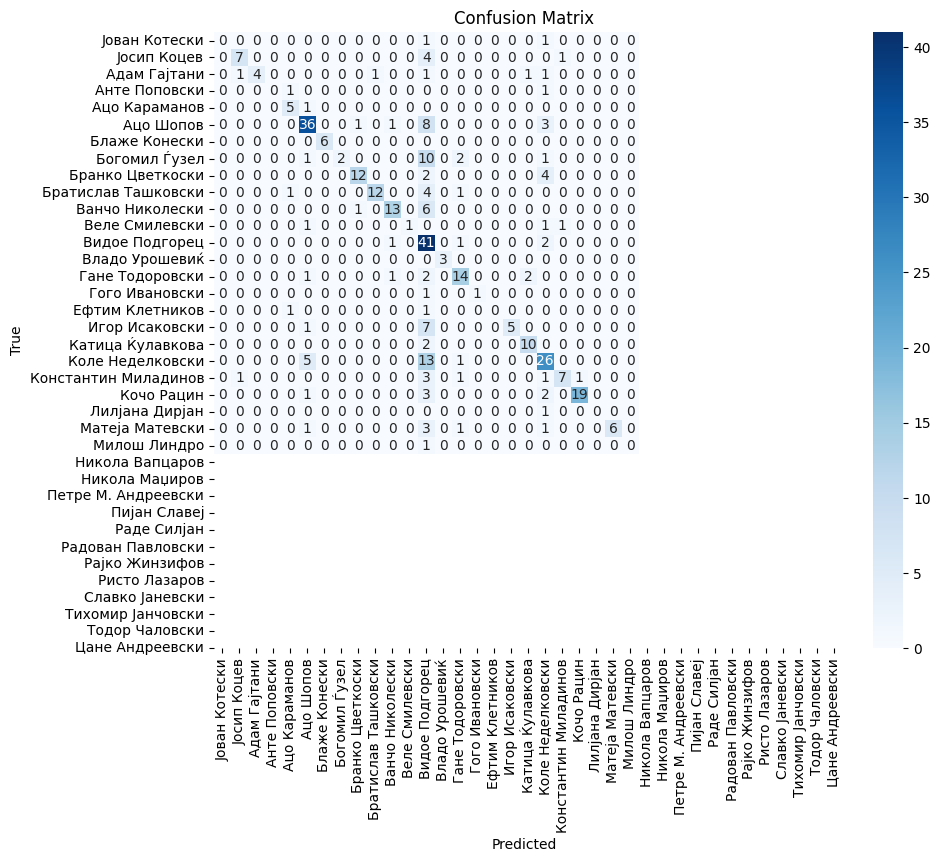

In [39]:

train, test = train_test_split(df, test_size=0.3, random_state=2)
train_x, train_y = train['song_text'], train['author']
test_x, test_y = test['song_text'], test['author']
all_authors=df['author']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_x).toarray()
X_test = vectorizer.transform(test_x).toarray()

label_encoder = LabelEncoder()
label_encoder.fit(all_authors)
train_y_encoded = label_encoder.transform(train_y)

mask = test_y.isin(train_y)
X_test = X_test[mask.values]
test_y = test_y[mask]
test_y_encoded = label_encoder.transform(test_y)

num_classes = len(label_encoder.classes_)
#####

map_vector = TfidfVectorizer()
tfidf=map_vector.fit_transform(df['song_text'])
data2D = PCA(n_components=2, random_state=47).fit_transform(tfidf.toarray())





####
n_layers = 1
neurons = 256
activation = "tanh"
dropout_rate =0.480277251582165
optimizer_name = "adam"
lr =  0.007411508775215715
epochs = 26
#####
n_layers= 1 
neurons= 256
activation ='relu'
dropout_rate= 0.12585953325685081
optimizer = 'rmsprop'

lr= 0.008932202078992958 
epochs= 97

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))

for _ in range(n_layers):
    model.add(layers.Dense(neurons, activation=activation))

model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation="softmax"))


optimizer = keras.optimizers.RMSprop(learning_rate=lr)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=epochs,
    batch_size=32,
    verbose=1
)

y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average="weighted")
f1_per_author = f1_score(test_y_encoded, y_pred, average=None)
authors = label_encoder.classes_
for author, score in zip(authors, f1_per_author):
    print(f"{author}: F1 = {score:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Analysis, tryint to calculate author effectivness.

In [ ]:

results_df = df.groupby('author').agg(
    char_count=('song_text', lambda x: x.str.len().sum()),
    word_count=('song_text', lambda x: x.str.split().str.len().sum()),
    num_songs=('song_text', 'count')
).reset_index()

f1_dict = dict(zip(authors, f1_per_author))

results_df['f1_score'] = results_df['author'].map(f1_dict)

missing_f1 = results_df[results_df['f1_score'].isna()]['author'].tolist()
if missing_f1:
    print(f"Warning: No F1 scores for authors: {missing_f1}")

max_songs = results_df['num_songs'].max()
max_words = results_df['word_count'].max()
max_chars = results_df['char_count'].max()

results_df['norm_songs'] = results_df['num_songs'] / max_songs
results_df['norm_words'] = results_df['word_count'] / max_words
results_df['norm_chars'] = results_df['char_count'] / max_chars



results_df['expressiveness'] = results_df['f1_score'] / results_df['norm_words']

results_df['expressiveness'] = results_df['expressiveness'].replace([np.inf, -np.inf], np.nan)

if results_df['expressiveness'].notna().any():  
    expr_min = results_df['expressiveness'].min()
    expr_max = results_df['expressiveness'].max()
    if expr_max != expr_min: 
        results_df['expressiveness_normalized'] = (
            (results_df['expressiveness'] - expr_min) / (expr_max - expr_min)
        )
    else:
    
        results_df['expressiveness_normalized'] = 0
else:
    
    results_df['expressiveness_normalized'] = np.nan


results_df = results_df.sort_values(by='expressiveness_normalized', ascending=False, na_position='last')


results_df

,author,char_count,word_count,num_songs,f1_score,norm_songs,norm_words,norm_chars,expressiveness,expressiveness_normalized
30,Радован Павловски,701,128,1,0.615385,0.005495,0.008211,0.008179,74.947115,1.000000
15,Гого Ивановски,898,148,1,0.500000,0.005495,0.009494,0.010478,52.665541,0.702703
25,Никола Вапцаров,1070,204,2,0.642202,0.010989,0.013086,0.012484,49.074924,0.654794
10,Ванчо Николески,1460,232,2,0.705882,0.010989,0.014882,0.017035,47.431034,0.632860
12,Видое Подгорец,1437,268,3,0.731707,0.016484,0.017192,0.016766,42.561886,0.567892
19,Коле Неделковски,2352,426,4,0.800000,0.021978,0.027327,0.027442,29.275117,0.390610
4,Ацо Караманов,2016,389,4,0.666667,0.021978,0.024953,0.023522,26.716367,0.356470
1,Јосип Коцев,2913,528,6,0.583333,0.032967,0.033870,0.033988,17.222696,0.229798
22,Лилјана Дирјан,3883,679,7,0.692308,0.038462,0.043556,0.045306,15.894528,0.212077
8,Бранко Цветкоски,17516,2786,41,0.866667,0.225275,0.178716,0.204371,4.849414,0.064704


835
359
Epoch 1/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3653 - loss: 5.5221 - val_accuracy: 0.2925 - val_loss: 5.1787
Epoch 2/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9749 - loss: 2.0700 - val_accuracy: 0.3203 - val_loss: 4.4198
Epoch 3/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 1.0679 - val_accuracy: 0.3120 - val_loss: 3.7502
Epoch 4/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9988 - loss: 0.5930 - val_accuracy: 0.3036 - val_loss: 3.3932
Epoch 5/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.4146 - val_accuracy: 0.3092 - val_loss: 3.2065
Epoch 6/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3315 - val_accuracy: 0.2869 - val_loss: 3.0809
Epoch 7/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.2814 - val_accuracy: 0.3036 - val_loss: 2.9636
Epoch 8/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.2698 - val_accuracy: 0.3008 - v

INFO:__main__:Јосип Коцев: F1 = 0.0000
INFO:__main__:Адам Гајтани: F1 = 0.6400
INFO:__main__:Анте Поповски: F1 = 0.6667
INFO:__main__:Ацо Караманов: F1 = 0.0000
INFO:__main__:Ацо Шопов: F1 = 0.5333
INFO:__main__:Блаже Конески: F1 = 0.6786
INFO:__main__:Богомил Ѓузел: F1 = 0.8333
INFO:__main__:Бранко Цветкоски: F1 = 0.5161
INFO:__main__:Братислав Ташковски: F1 = 0.5882
INFO:__main__:Ванчо Николески: F1 = 0.0000
INFO:__main__:Веле Смилевски: F1 = 0.5517
INFO:__main__:Видое Подгорец: F1 = 0.0000
INFO:__main__:Владо Урошевиќ: F1 = 0.7222
INFO:__main__:Гане Тодоровски: F1 = 0.6000
INFO:__main__:Ефтим Клетников: F1 = 0.6329
INFO:__main__:Игор Исаковски: F1 = 0.5714
INFO:__main__:Катица Ќулавкова: F1 = 0.4615
INFO:__main__:Коле Неделковски: F1 = 0.0000
INFO:__main__:Константин Миладинов: F1 = 0.0000
INFO:__main__:Кочо Рацин: F1 = 0.6667
INFO:__main__:Лилјана Дирјан: F1 = 0.0000
INFO:__main__:Матеја Матевски: F1 = 0.7500
INFO:__main__:Милош Линдро: F1 = 0.6667
INFO:__main__:Никола Вапцаров: F1

sum 359


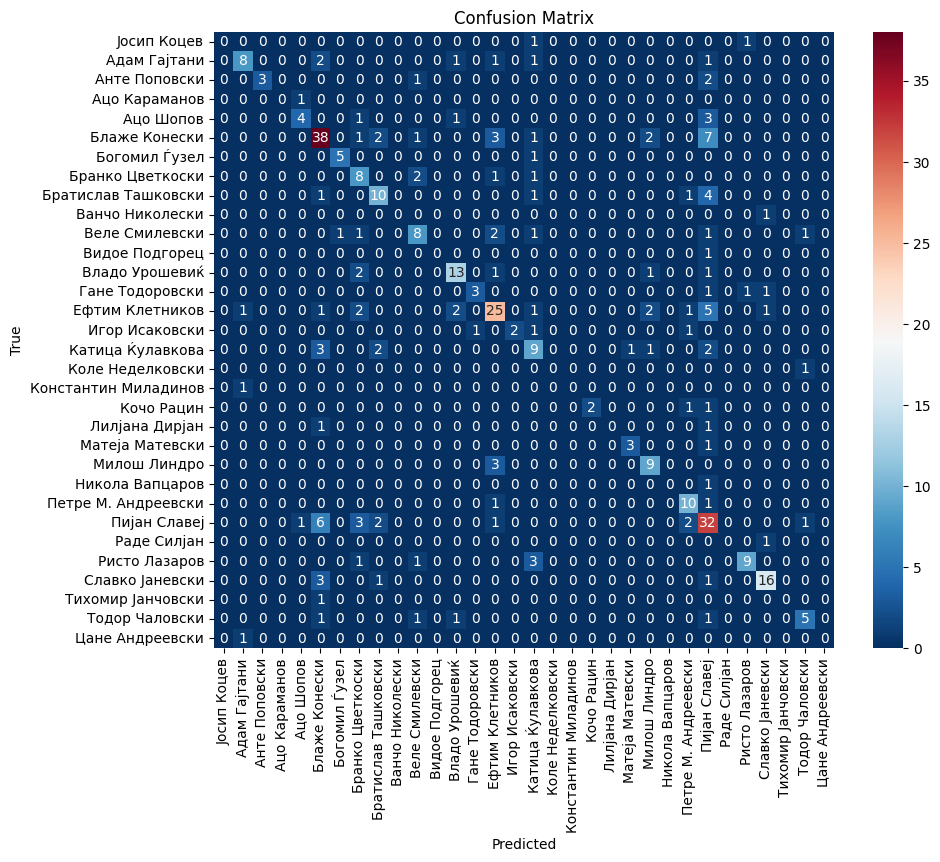

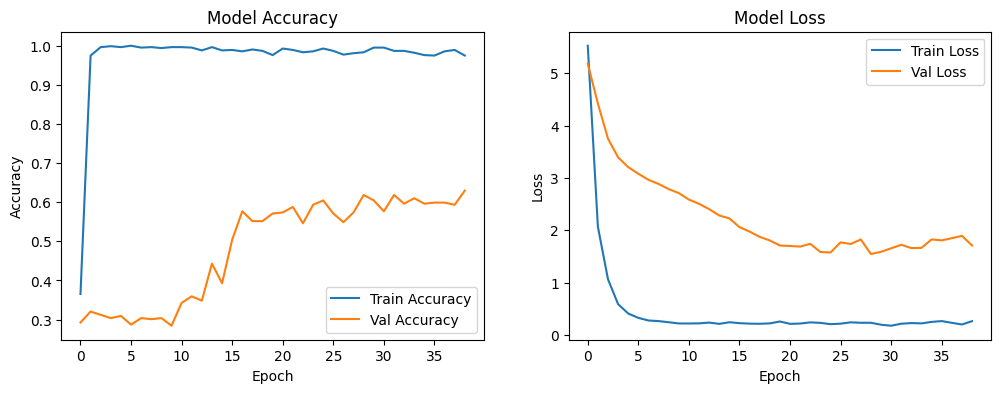

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import logging
import textwrap

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
def preprocess_data(df, test_size=0.3, random_state=47, min_samples=2):

    
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(len(train_x))
    print(len(test_x))
    
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()
    
   
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y_encoded = label_encoder.transform(test_y[mask])
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer

def build_model(input_shape, num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate= 0.12585953325685081, lr= 0.008932202078992958 ):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)

model = build_model(X_train.shape[1], num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate=0.2, lr=0.001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=97,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average='weighted')
f1_per_author = f1_score(test_y_encoded, y_pred, average=None)
for author, score in zip(label_encoder.classes_, f1_per_author):
    logger.info(f"{author}: F1 = {score:.4f}")
logger.info(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred, normalize='true')


num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))  
annot_font_size = max(6, 12 - num_classes * 0.15)  
label_font_size = max(8, 14 - num_classes * 0.15)  


wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]


cm = confusion_matrix(test_y_encoded, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

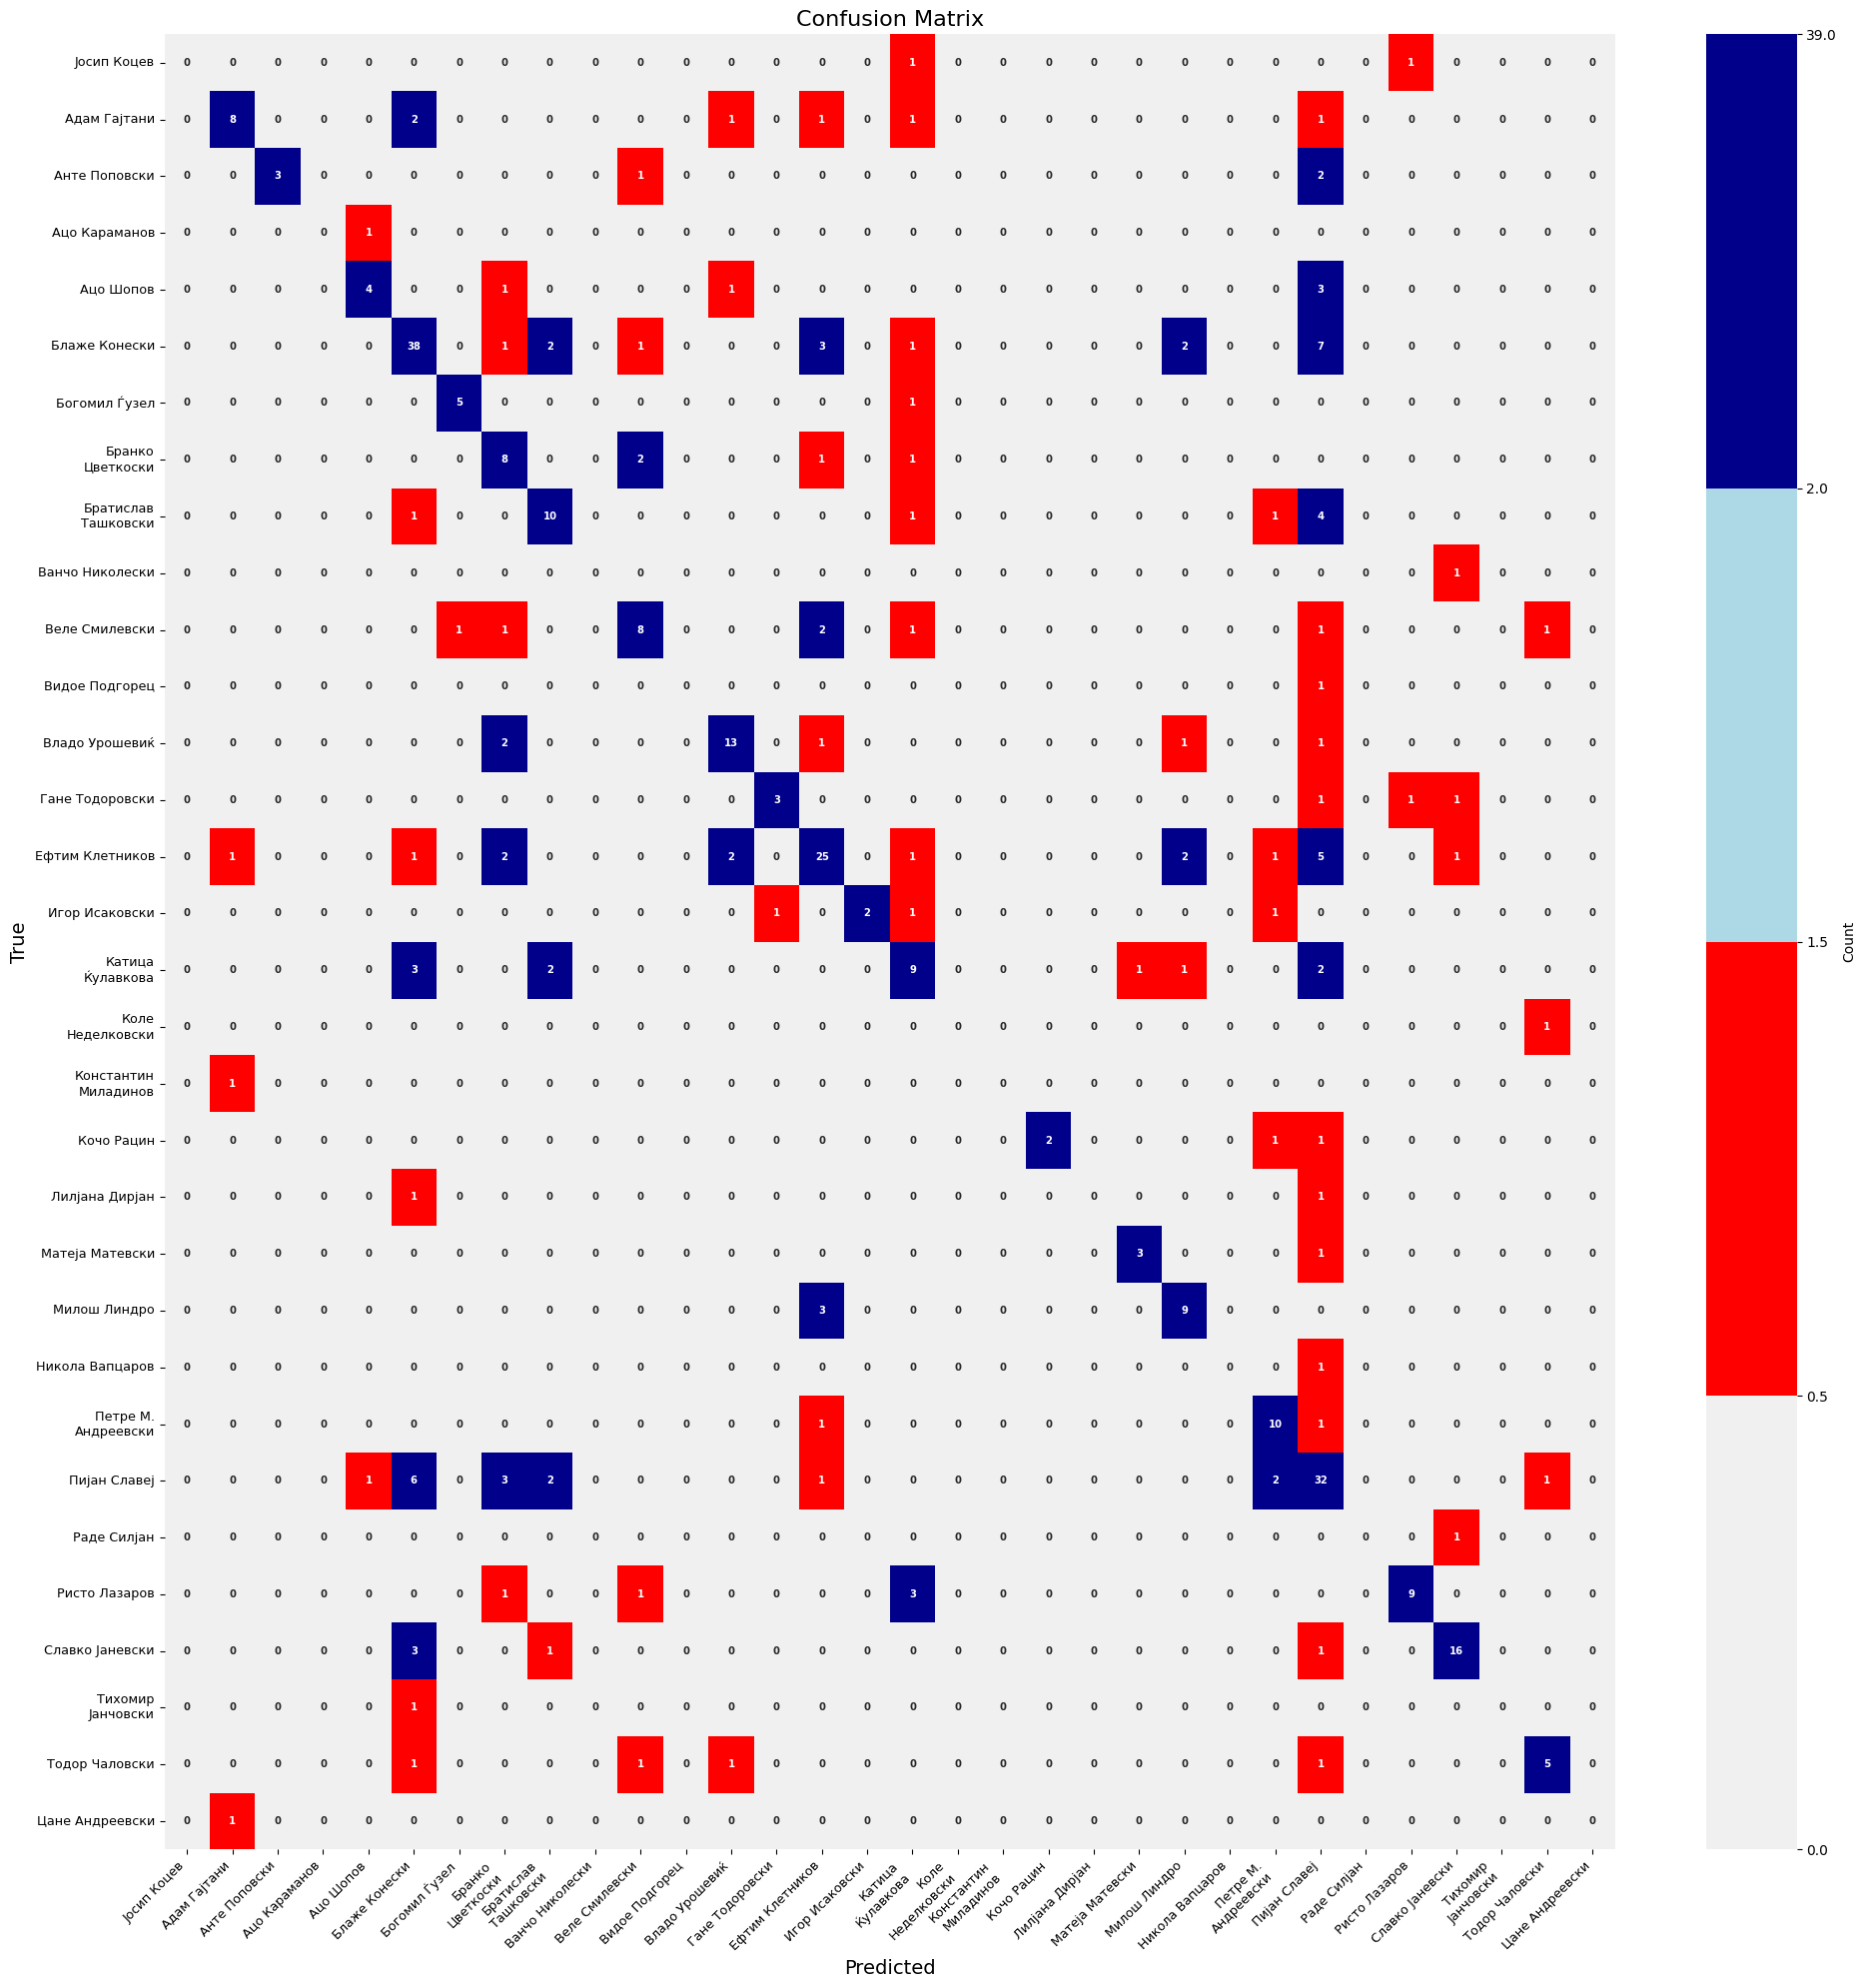

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Compute confusion matrix (unchanged)
cm = confusion_matrix(test_y_encoded, y_pred)  # Raw counts for display

# Define custom colormap
colors = ['#F0F0F0', '#FF0000', '#ADD8E6', '#00008B']  # Light gray (0), red (1), light blue (2), dark blue (3+)
boundaries = [0, 0.5, 1.5, 2, np.max(cm) + 1]  # Boundaries for 0, 1, 2, 3+
cmap = ListedColormap(colors)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Set figure size and font scaling
num_classes = len(label_encoder.classes_)  # 32 authors
figsize = (20, 20)  # Large figure for 32x32 matrix
annot_font_size = max(6, 12 - num_classes * 0.15)  # Smaller font for annotations
label_font_size = max(8, 14 - num_classes * 0.15)  # Smaller font for labels

# Wrap labels to avoid overlap
wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]

# Plot confusion matrix with custom colormap
plt.figure(figsize=figsize)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, norm=norm,
            xticklabels=wrapped_labels,
            yticklabels=wrapped_labels,
            annot_kws={"size": annot_font_size, "weight": "bold"},
            cbar_kws={'label': 'Count'})
plt.xticks(rotation=45, ha='right', fontsize=label_font_size)
plt.yticks(rotation=0, fontsize=label_font_size)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()